In [107]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [108]:
leads_data = pd.read_csv('Leads.csv', encoding = 'latin')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [110]:
leads_data.shape

(9240, 37)

In [111]:
leads_data.describe

<bound method NDFrame.describe of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Dire

#### Missing values

In [112]:
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Converting select to null values.

In [113]:
leads_data['Specialization'] = leads_data['Specialization'].replace('Select', np.nan)
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select', np.nan)
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select', np.nan)
leads_data['City'] = leads_data['City'].replace('Select', np.nan)

#### Checking missing values again

In [114]:
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping the columns having null values more than 30%.

In [115]:
leads_data = leads_data.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [116]:
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [117]:
leads_data["Country"].fillna("Unknown",inplace=True)

In [118]:
leads_data["Country"].isnull().sum()

0

In [119]:
leads_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [120]:
leads_data["What is your current occupation"].fillna("Unknown",inplace=True)

In [121]:
leads_data["What is your current occupation"].isnull().sum()

0

In [122]:
leads_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [123]:
leads_data["What matters most to you in choosing a course"].fillna("Unknown",inplace=True)

In [124]:
leads_data["What matters most to you in choosing a course"].isnull().sum()

0

In [125]:
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [126]:
leads_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [127]:
leads_data["Lead Source"].fillna("Google",inplace=True)

In [128]:
leads_data["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [129]:
leads_data['TotalVisits'].median()

3.0

In [130]:
leads_data['TotalVisits'] = leads_data['TotalVisits'].replace(np.nan, leads_data['TotalVisits'].median())

In [131]:
leads_data["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [132]:
leads_data['Page Views Per Visit'].median()

2.0

In [133]:
leads_data['Page Views Per Visit'] = leads_data['Page Views Per Visit'].replace(np.nan, leads_data['Page Views Per Visit'].median())

In [134]:
leads_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [135]:
leads_data["Last Activity"].fillna("Email Opened ",inplace=True)

In [136]:
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [137]:
leads_data.shape

(9240, 27)

#### Dropping the columns having constant features.

In [138]:
leads_data = leads_data.drop(['What matters most to you in choosing a course'], axis=1)

In [139]:
leads_data = leads_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [140]:
leads_data.shape

(9240, 21)

In [141]:
leads_data = leads_data.drop(["Prospect ID","Lead Number"], axis=1)

In [142]:
leads_data.shape

(9240, 19)

#### Outliers Treatment

In [143]:
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


#### Numerical Features

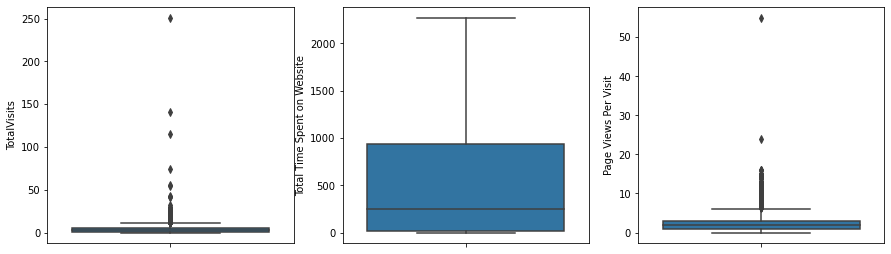

In [144]:
plt.figure(figsize=(15, 20))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',  data = leads_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads_data)
plt.show()

#### Removing values beyond 99% for TotalVisits

In [145]:
nn_quartile_total_visits = leads_data['TotalVisits'].quantile(0.99)
leads_data = leads_data[leads_data["TotalVisits"] < nn_quartile_total_visits]
leads_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [146]:
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.000000,9141.000000,9141.000000,9141.000000
mean,0.385406,3.179740,486.074609,2.329506
std,0.486718,2.913631,547.856302,2.046673
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,933.000000,3.000000
90%,1.000000,7.000000,1379.000000,5.000000
95%,1.000000,9.000000,1561.000000,6.000000
99%,1.000000,13.000000,1839.600000,9.000000


In [147]:
nn_quartile_page_visits = leads_data['Page Views Per Visit'].quantile(0.99)
leads_data = leads_data[leads_data["Page Views Per Visit"] < nn_quartile_page_visits]
leads_data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [148]:
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


In [296]:
leads_data.shape

(9029, 72)

### DATA ANALYSIS

In [149]:
# Converted
leads_0=leads_data.loc[leads_data["Converted"]==0]
leads_1=leads_data.loc[leads_data["Converted"]==1]

<AxesSubplot:>

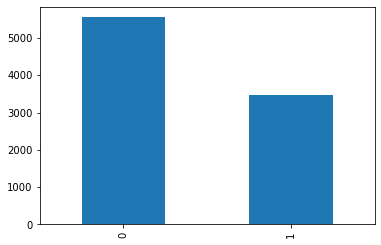

In [150]:
leads_data.Converted.value_counts().plot(kind="bar")

In [151]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Do Not Call                             9029 non-null   object 
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   Last Activity                           9029 non-null   object 
 9   Country                                 9029 non-null   object 
 10  What is your current occupation         9029 non-null   obje

In [152]:
leads_data["Lead Origin"].value_counts()

Landing Page Submission    4716
API                        3540
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

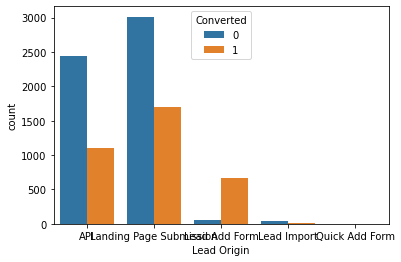

In [153]:
sns.countplot(x="Lead Origin", hue="Converted", data=leads_data)
plt.show()

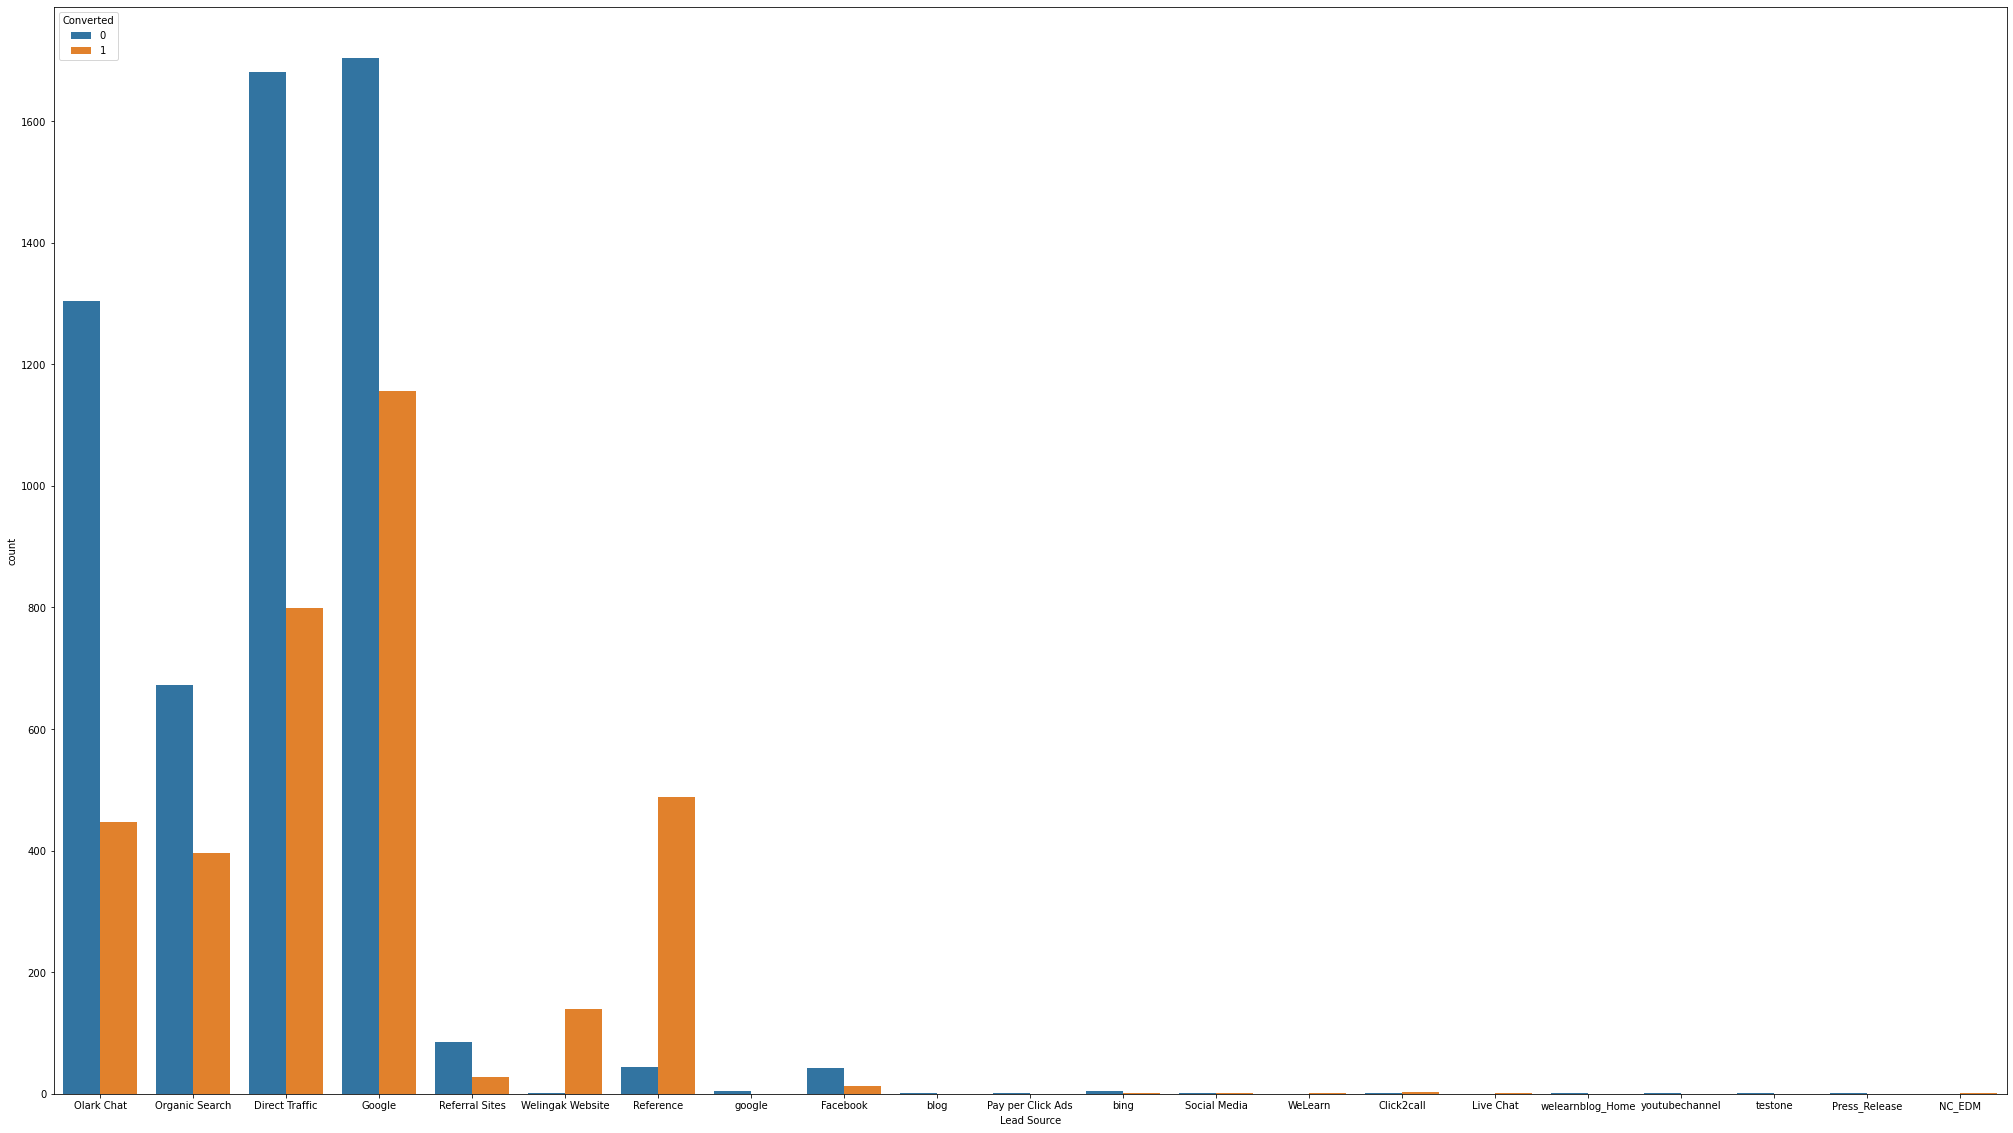

In [154]:
plt.figure(figsize=(35,20))
sns.countplot(x="Lead Source", hue="Converted", data=leads_data)
plt.show()

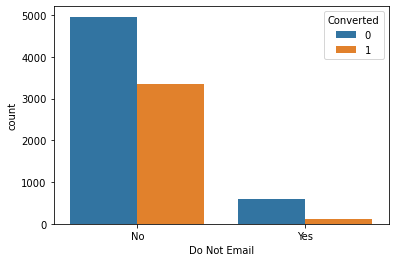

In [155]:
sns.countplot(x="Do Not Email", hue="Converted", data=leads_data)
plt.show()

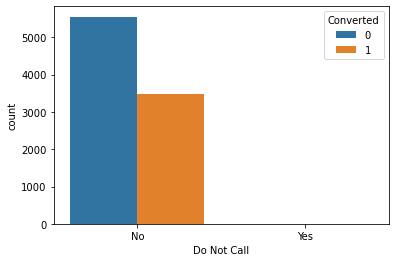

In [156]:
sns.countplot(x="Do Not Call", hue="Converted", data=leads_data)
plt.show()

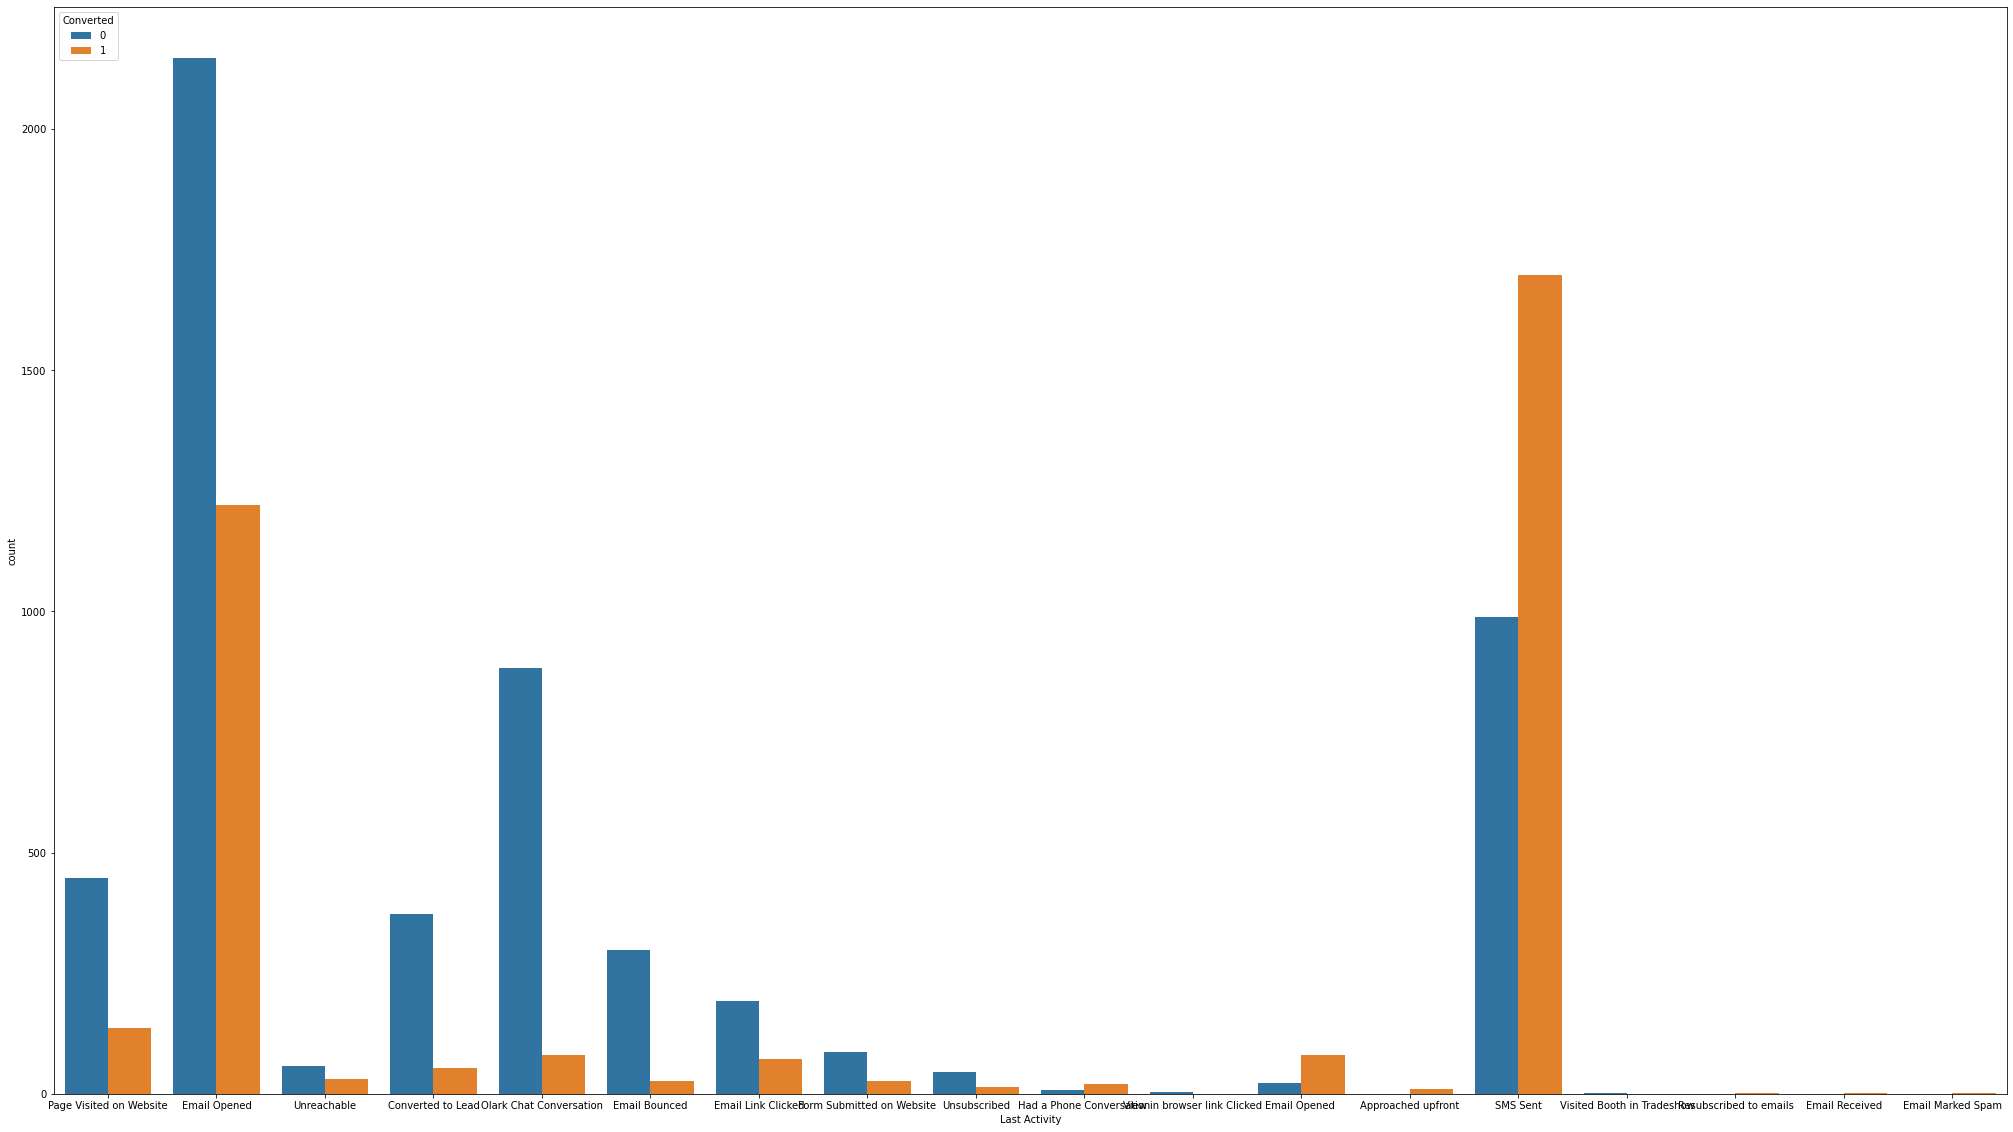

In [157]:
plt.figure(figsize=(35,20))
sns.countplot(x="Last Activity", hue="Converted", data=leads_data)
plt.show()

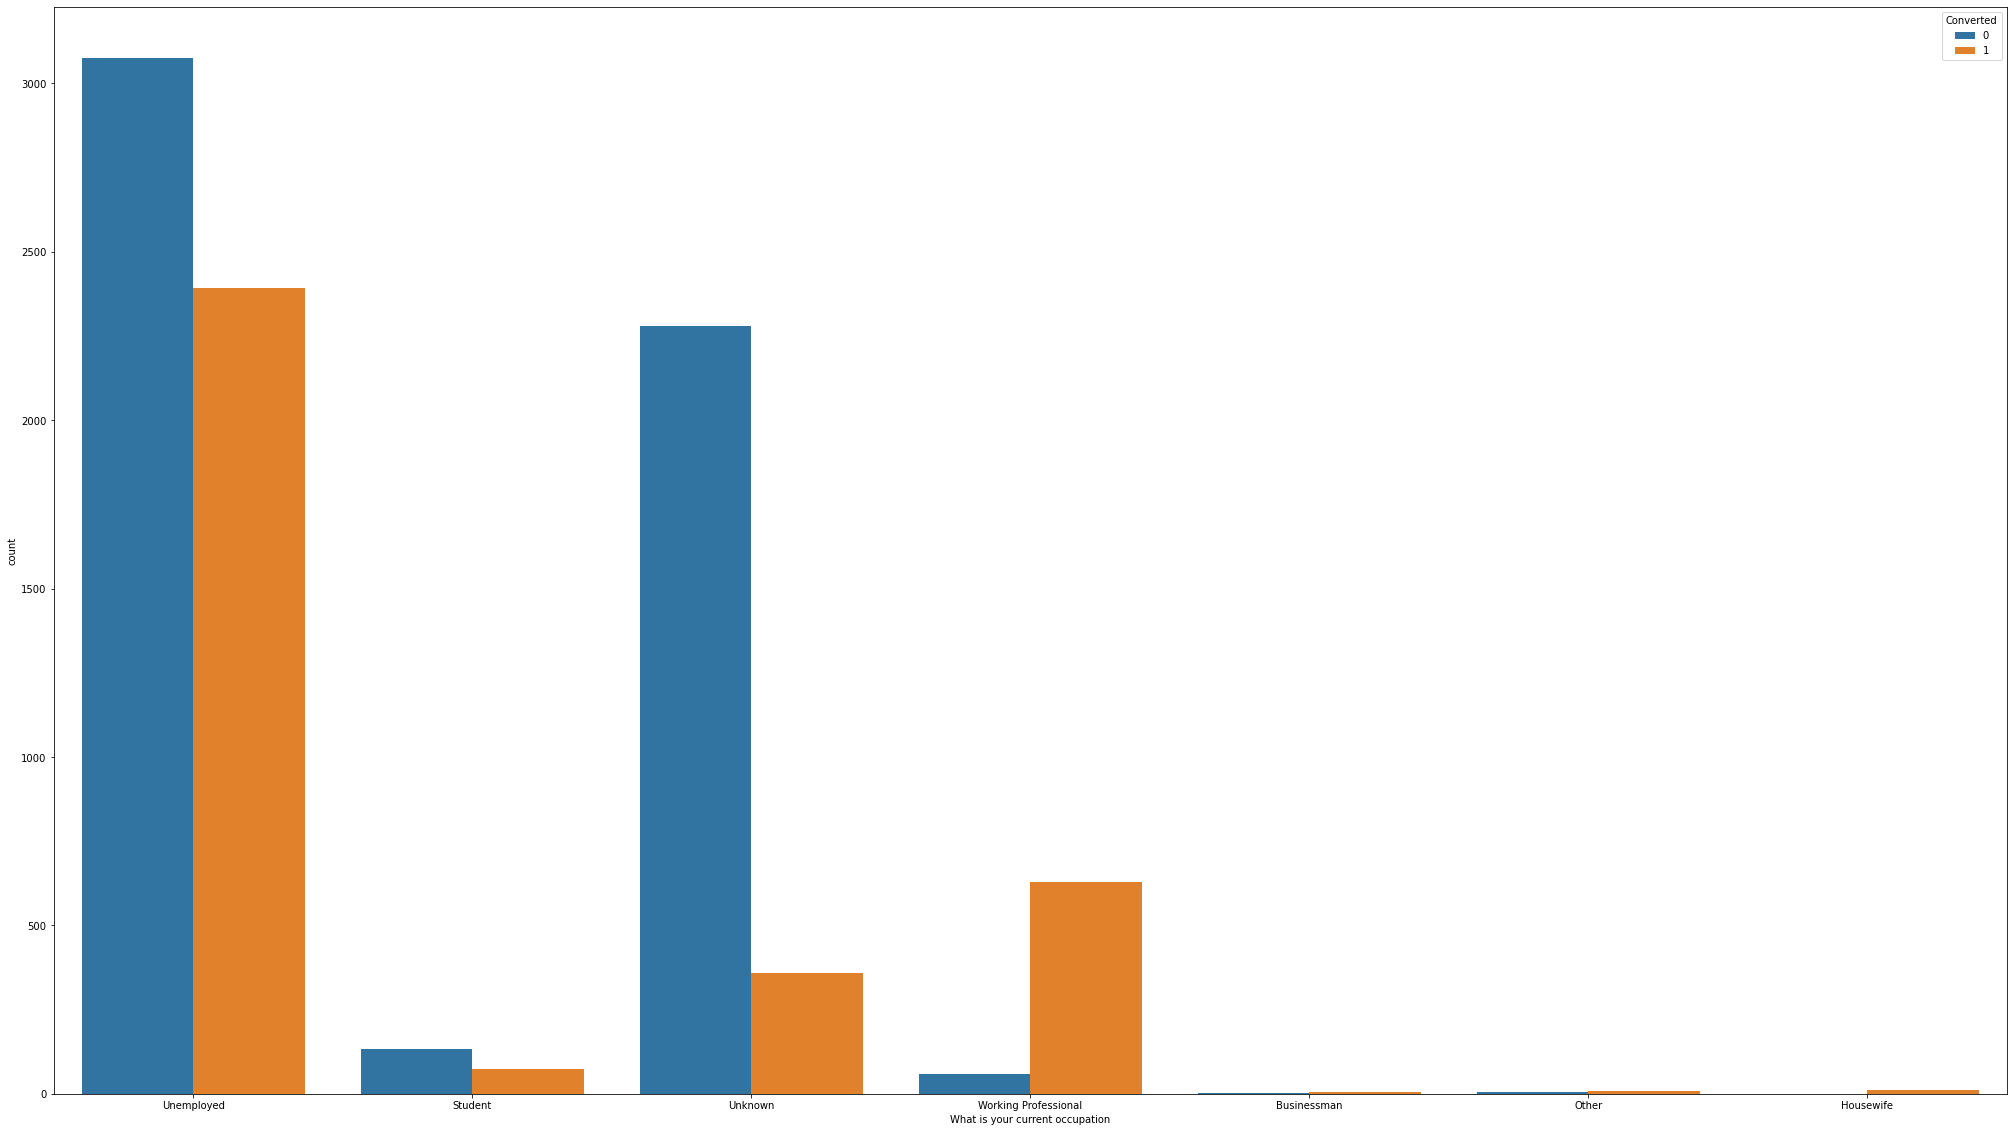

In [158]:
plt.figure(figsize=(35,20))
sns.countplot(x="What is your current occupation", hue="Converted", data=leads_data)
plt.show()

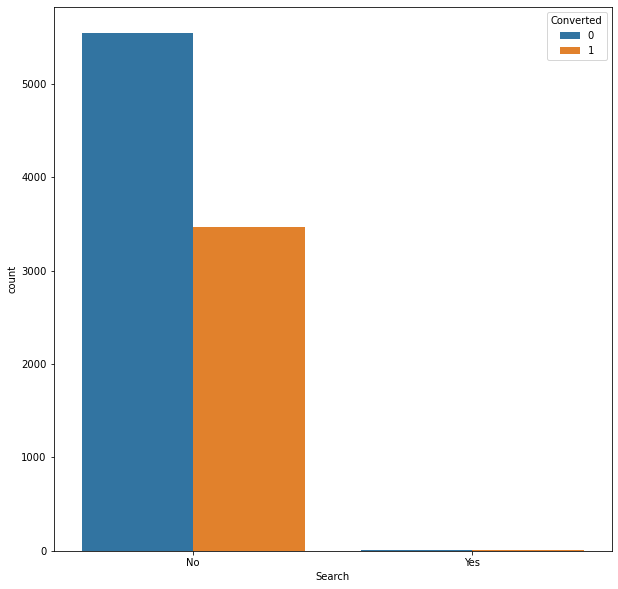

In [159]:
plt.figure(figsize=(10,10))
sns.countplot(x="Search", hue="Converted", data=leads_data)
plt.show()

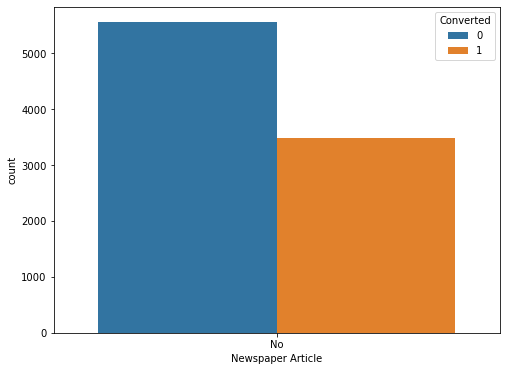

In [160]:
plt.figure(figsize=(8,6))
sns.countplot(x="Newspaper Article", hue="Converted", data=leads_data)
plt.show()

In [161]:
leads_data = leads_data.drop(['Newspaper Article'], axis=1)

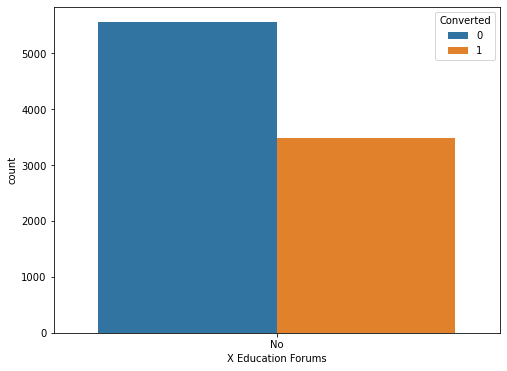

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(x="X Education Forums", hue="Converted", data=leads_data)
plt.show()

In [163]:
leads_data = leads_data.drop(['X Education Forums'], axis=1)

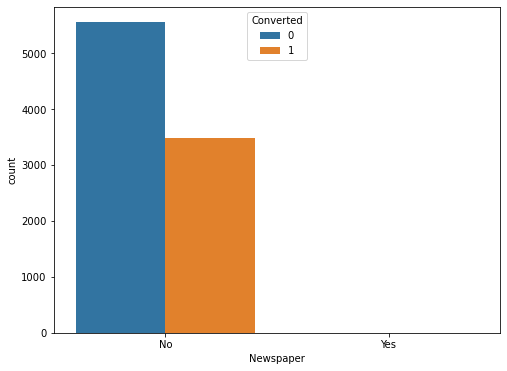

In [164]:
plt.figure(figsize=(8,6))
sns.countplot(x="Newspaper", hue="Converted", data=leads_data)
plt.show()

In [165]:
leads_data = leads_data.drop(['Newspaper'], axis=1)

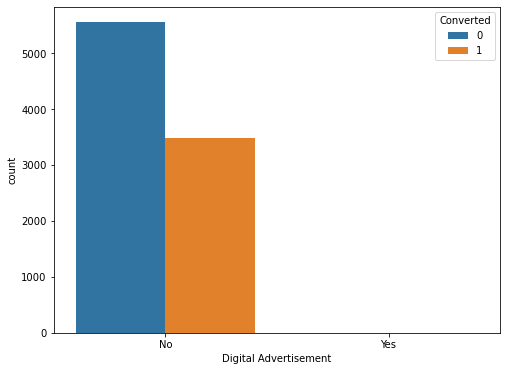

In [166]:
plt.figure(figsize=(8,6))
sns.countplot(x="Digital Advertisement", hue="Converted", data=leads_data)
plt.show()

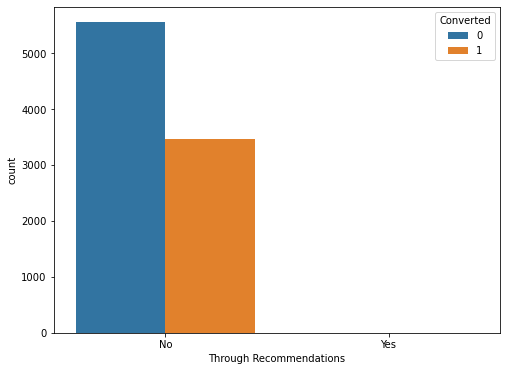

In [167]:
plt.figure(figsize=(8,6))
sns.countplot(x="Through Recommendations", hue="Converted", data=leads_data)
plt.show()

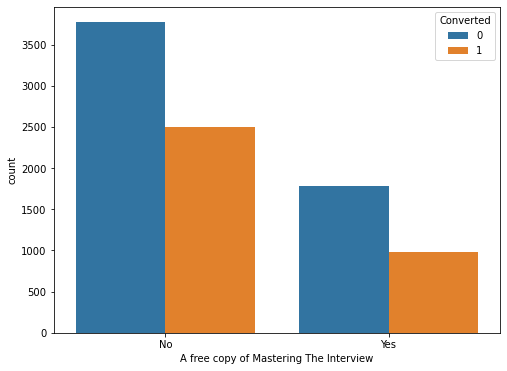

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=leads_data)
plt.show()

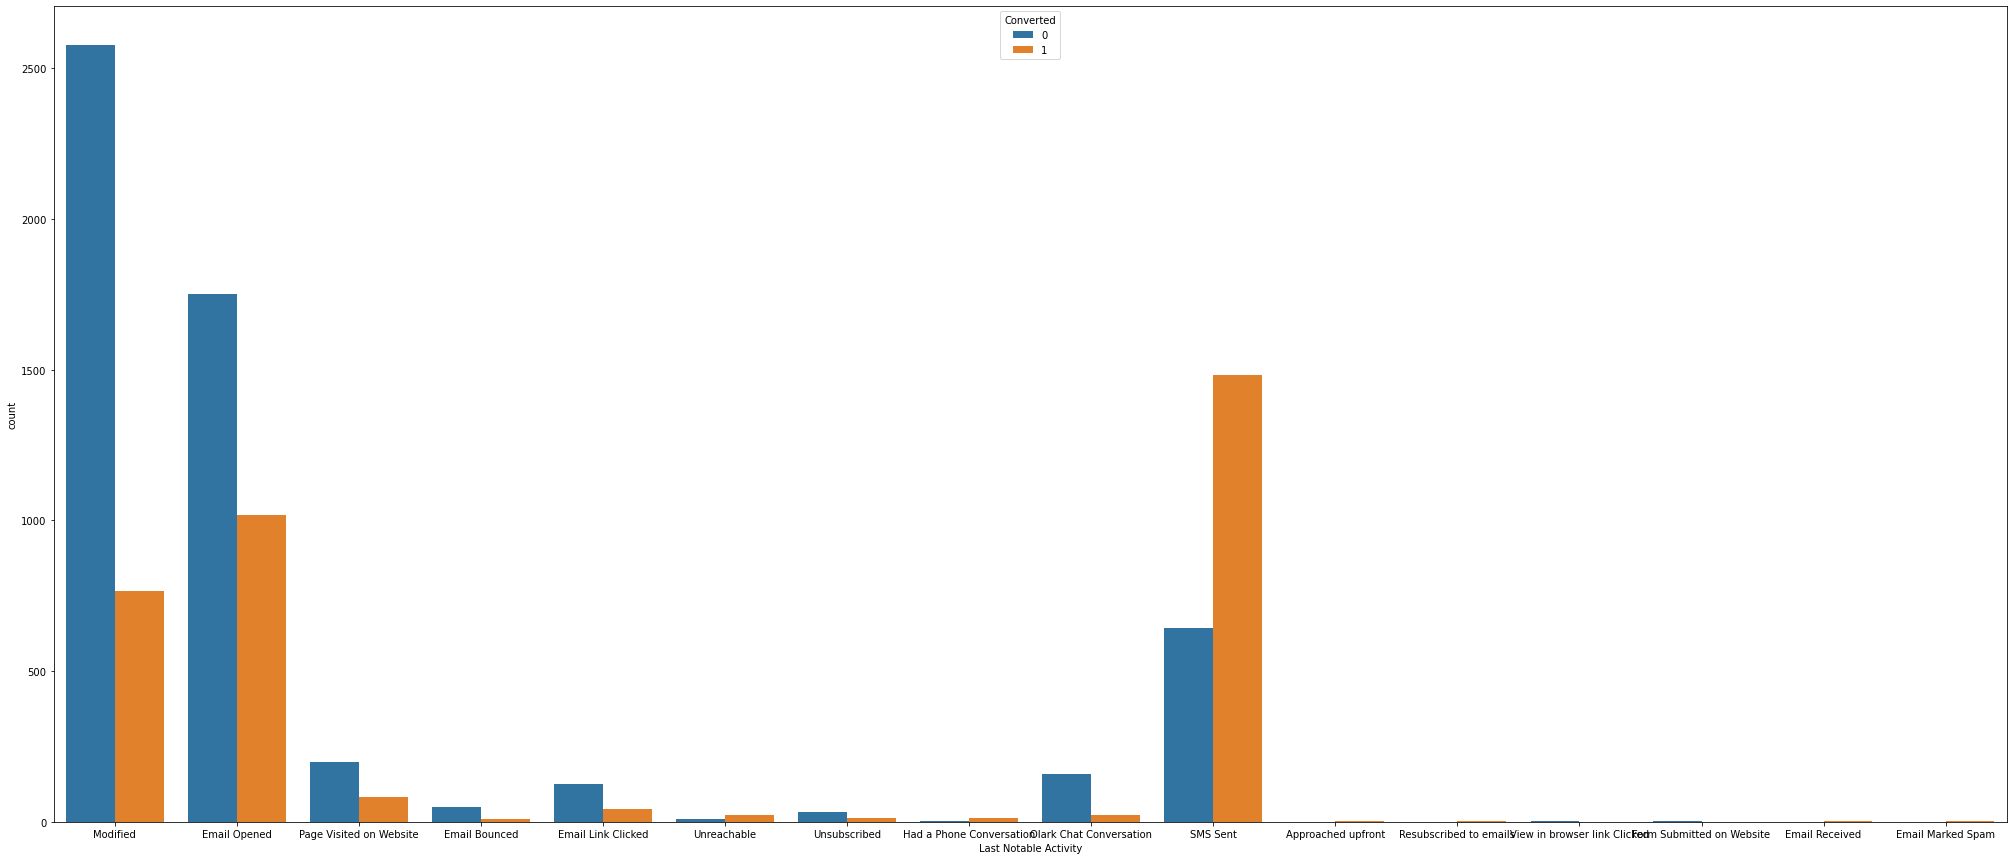

In [169]:
plt.figure(figsize=(35,15))
sns.countplot(x="Last Notable Activity", hue="Converted", data=leads_data)
plt.show()

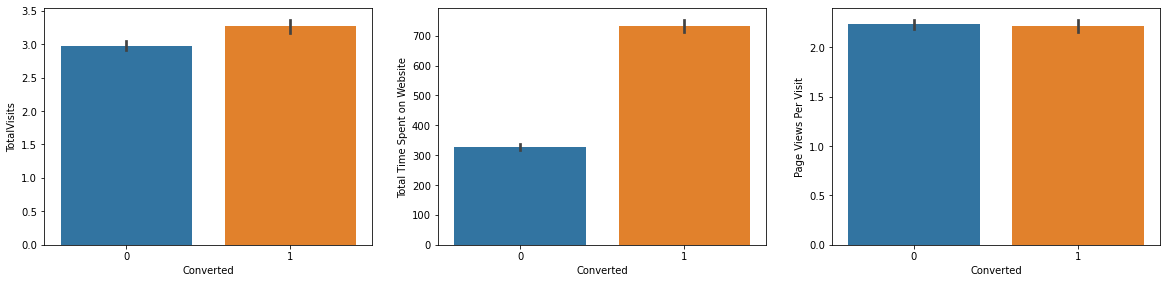

In [170]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leads_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = leads_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leads_data)
plt.show()

In [171]:
BoolFeatures = ["Do Not Email","Do Not Call","Search","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]

In [172]:
for each in BoolFeatures:
    if leads_data[each].value_counts().values.sum() > 0:
        leads_data[each]=leads_data[each].map(dict(Yes=1,No=0))  

### Creating Dummies

In [173]:
ml = pd.get_dummies(leads_data["Lead Origin"],prefix="Lead Origin")
ml1=ml.drop(["Lead Origin_Quick Add Form"],axis=1)
leads_data=pd.concat([leads_data,ml1],axis=1)

In [174]:
ml = pd.get_dummies(leads_data["Lead Source"],prefix="Lead Source")
ml1=ml.drop(["Lead Source_NC_EDM"],axis=1)
leads_data=pd.concat([leads_data,ml1],axis=1)

In [175]:
ml = pd.get_dummies(leads_data["Last Activity"],prefix="Last Activity")
ml1=ml.drop(["Last Activity_Resubscribed to emails"],axis=1)
leads_data=pd.concat([leads_data,ml1],axis=1)

In [176]:
ml = pd.get_dummies(leads_data["What is your current occupation"],prefix="What is your current occupation")
ml1=ml.drop(["What is your current occupation_Businessman"],axis=1)
leads_data=pd.concat([leads_data,ml1],axis=1)

In [177]:
ml = pd.get_dummies(leads_data["Last Notable Activity"],prefix="Last Notable Activity")
ml1=ml.drop(["Last Notable Activity_Resubscribed to emails"],axis=1)
leads_data=pd.concat([leads_data,ml1],axis=1)

In [178]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9029 non-null   object 
 1   Lead Source                                           9029 non-null   object 
 2   Do Not Email                                          9029 non-null   int64  
 3   Do Not Call                                           9029 non-null   int64  
 4   Converted                                             9029 non-null   int64  
 5   TotalVisits                                           9029 non-null   float64
 6   Total Time Spent on Website                           9029 non-null   int64  
 7   Page Views Per Visit                                  9029 non-null   float64
 8   Last Activity                                         9029

In [179]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [180]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Do Not Call                                           9029 non-null   int64  
 2   Converted                                             9029 non-null   int64  
 3   TotalVisits                                           9029 non-null   float64
 4   Total Time Spent on Website                           9029 non-null   int64  
 5   Page Views Per Visit                                  9029 non-null   float64
 6   Country                                               9029 non-null   object 
 7   Search                                                9029 non-null   int64  
 8   Digital Advertisement                                 9029

In [181]:
leads_data = leads_data.drop(['Country'], axis=1)

In [196]:
leads_data.shape

(9029, 72)

### Train-Test Split

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [185]:
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [187]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [188]:
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

38.50924797873519

### Model Building

In [189]:
import statsmodels.api as sm

In [190]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Oct 2022   Deviance:                   1.3705e+05
Time:                        10:16:13   Pearson chi2:                 6.70e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.335e+15   6.41e+07   6.76e+07      0.000    4.34e+15    4.34e+15
Do Not Email                                         -6.326e+14   4.48e+06  -1.41e+08      0.000   -6.33e+14   -6.33e+14
Do Not Call                                           5.252e+15   4.76e+07    1.1e+08      0.000    5.25e+15    5.25e+15
TotalVisits                                           2.345e+14   7.66e+06   3.06e+07      0.000    2.35e+14    2.35e+14
Total Time Spent on Website                           4.701e+14   4.01e+06   1.17e+08      0.000     4.7e+14     4.7e+14
Page Views Per Visit                                  1.965e+14   6.52e+06   3.02e+07      0.000    1.97e+14    1.97e+14
Search                                               -2.246e+14   2.44e+07   -9.2e+06      0.000   -2.25e+14   -2.25e+14
Digital Advertisement                                 4.389e+14   4.76e+07   9.23e+06      0.000    4.39e+14    4.39e+14
Through Recommendations                               5.267e+14    4.2e+07   1.25e+07      0.000    5.27e+14    5.27e+14
A free copy of Mastering The Interview                1.532e+14    2.5e+06   6.13e+07      0.000    1.53e+14    1.53e+14
Lead Origin_API                                      -6.028e+15   6.74e+07  -8.94e+07      0.000   -6.03e+15   -6.03e+15
Lead Origin_Landing Page Submission                  -6.045e+15   6.74e+07  -8.97e+07      0.000   -6.05e+15   -6.05e+15
Lead Origin_Lead Add Form                            -5.873e+15   6.86e+07  -8.56e+07      0.000   -5.87e+15   -5.87e+15
Lead Origin_Lead Import                              -5.356e+15   8.27e+07  -6.48e+07      0.000   -5.36e+15   -5.36e+15
Lead Source_Click2call                                3.601e+15    4.7e+07   7.67e+07      0.000     3.6e+15     3.6e+15
Lead Source_Direct Traffic                            9.945e+14   1.12e+07   8.92e+07      0.000    9.94e+14    9.94e+14
Lead Source_Facebook                                  4.733e+14   4.62e+07   1.02e+07      0.000    4.73e+14    4.73e+14
Lead Source_Google                                    1.188e+15    1.1e+07   1.08e+08      0.000    1.19e+15    1.19e+15
Lead Source_Live Chat                                 4.667e+15   4.68e+07   9.96e+07      0.000    4.67e+15    4.67e+15
Lead Source_Olark Chat                                1.565e+15   1.13e+07   1.38e+08      0.000    1.57e+15    1.57e+15
Lead Source_Organic Search                             1.19e+15   1.13e+07   1.06e+08      0.000    1.19e+15    1.19e+15
Lead Source_Pay per Click Ads                            8.0560   2.01e-07   4.01e+07      0.000       8.056       8.056
Lead Source_Press_Release                              -12

In [191]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [192]:
from sklearn.feature_selection import RFE

In [193]:
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [194]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False])

In [195]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 29),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_API', False, 9),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Click2call', False, 27),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_WeLear

In [198]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## RFE MODEL - 1

In [199]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Tue, 18 Oct 2022   Deviance:                       5002.3
Time:                        10:23:27   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                            -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                              1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                              4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                                    -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                                  -1.6356      1.011     -1.618      0.106      -3.617       0.346
Lead Origin_Lead Add Form                                3.0358      0.512      5.932      0.000       2.033       4.039
Lead Source_Olark Chat                                   1.4699      0.134     10.947      0.000       1.207       1.733
Lead Source_Reference                                    0.6403      0.540      1.185      0.236      -0.418       1.699
Lead Source_Welingak Website                             2.6586      0.876      3.036      0.002       0.942       4.375
Last Activity_Approached upfront                        23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
Last Activity_Email Opened                               0.5394      0.117      4.599      0.000       0.310       0.769
Last Activity_Had a Phone Conversation                   1.1718      0.939      1.248      0.212      -0.668       3.011
Last Activity_Olark Chat Conversation                   -0.5893      0.190     -3.101      0.002      -0.962      -0.217
Last Activity_SMS Sent                                   1.7403      0.118     14.697      0.000       1.508       1.972
What is your current occupation_Housewife               23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
What is your current occupation_Unknown                 -1.2346      0.090    -13.681      0.000      -1.411      -1.058
What is your current occupation_Working Professional     2.6225      0.203     12.889      0.000       2.224       3.021
Last Notable Activity_Had a Phone Conversation           2.3799      1.501      1.585      0.113      -0.562       5.322
Last Notable Activity_Modified                          -0.5521      0.090     -6.131      0.000      -0.729      -0.376
Last Notable Activity_Unreachable                        2.0387      0.556      3.665      0.000       0.948       3.129
========================================================================================================================
"""

In [202]:
rfe_col = rfe_col.drop('Last Activity_Approached upfront',0)

## RFE MODEL -2 

In [203]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Tue, 18 Oct 2022   Deviance:                       5013.2
Time:                        10:31:23   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                            -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                              1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                              4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                                    -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                                  -1.6363      1.012     -1.617      0.106      -3.620       0.347
Lead Origin_Lead Add Form                                3.0402      0.511      5.946      0.000       2.038       4.042
Lead Source_Olark Chat                                   1.4873      0.134     11.087      0.000       1.224       1.750
Lead Source_Reference                                    0.6399      0.540      1.186      0.236      -0.418       1.698
Lead Source_Welingak Website                             2.6555      0.875      3.034      0.002       0.940       4.371
Last Activity_Email Opened                               0.5164      0.117      4.424      0.000       0.288       0.745
Last Activity_Had a Phone Conversation                   1.1429      0.939      1.218      0.223      -0.697       2.982
Last Activity_Olark Chat Conversation                   -0.6220      0.190     -3.282      0.001      -0.994      -0.250
Last Activity_SMS Sent                                   1.7182      0.118     14.579      0.000       1.487       1.949
What is your current occupation_Housewife               22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
What is your current occupation_Unknown                 -1.2409      0.090    -13.758      0.000      -1.418      -1.064
What is your current occupation_Working Professional     2.6161      0.203     12.868      0.000       2.218       3.015
Last Notable Activity_Had a Phone Conversation           2.3908      1.501      1.592      0.111      -0.552       5.333
Last Notable Activity_Modified                          -0.5431      0.090     -6.041      0.000      -0.719      -0.367
Last Notable Activity_Unreachable                        2.0197      0.556      3.630      0.000       0.929       3.110
========================================================================================================================
"""

In [206]:
rfe_col = rfe_col.drop('What is your current occupation_Housewife',1)

### Model - 4

In [207]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Tue, 18 Oct 2022   Deviance:                       5026.7
Time:                        11:41:37   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                            -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                              1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                              4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                                    -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                                  -1.6358      1.011     -1.619      0.106      -3.617       0.345
Lead Origin_Lead Add Form                                3.0313      0.511      5.930      0.000       2.029       4.033
Lead Source_Olark Chat                                   1.4768      0.134     11.028      0.000       1.214       1.739
Lead Source_Reference                                    0.6579      0.539      1.220      0.223      -0.399       1.715
Lead Source_Welingak Website                             2.6524      0.875      3.030      0.002       0.937       4.368
Last Activity_Email Opened                               0.5166      0.116      4.440      0.000       0.289       0.745
Last Activity_Had a Phone Conversation                   1.1276      0.939      1.201      0.230      -0.712       2.967
Last Activity_Olark Chat Conversation                   -0.6290      0.189     -3.322      0.001      -1.000      -0.258
Last Activity_SMS Sent                                   1.7107      0.118     14.551      0.000       1.480       1.941
What is your current occupation_Unknown                 -1.2457      0.090    -13.822      0.000      -1.422      -1.069
What is your current occupation_Working Professional     2.6078      0.203     12.834      0.000       2.210       3.006
Last Notable Activity_Had a Phone Conversation           2.3999      1.501      1.598      0.110      -0.543       5.343
Last Notable Activity_Modified                          -0.5378      0.090     -5.995      0.000      -0.714      -0.362
Last Notable Activity_Unreachable                        2.0149      0.556      3.621      0.000       0.924       3.105
========================================================================================================================
"""

In [209]:
rfe_col = rfe_col.drop('Last Activity_Had a Phone Conversation',1)

## Model -5 

In [210]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Tue, 18 Oct 2022   Deviance:                       5028.2
Time:                        11:52:16   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                            -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                              1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                              4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                                    -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                                  -1.6344      1.011     -1.617      0.106      -3.615       0.346
Lead Origin_Lead Add Form                                3.0307      0.511      5.931      0.000       2.029       4.032
Lead Source_Olark Chat                                   1.4756      0.134     11.022      0.000       1.213       1.738
Lead Source_Reference                                    0.6636      0.539      1.231      0.219      -0.393       1.721
Lead Source_Welingak Website                             2.6507      0.875      3.029      0.002       0.935       4.366
Last Activity_Email Opened                               0.5072      0.116      4.373      0.000       0.280       0.735
Last Activity_Olark Chat Conversation                   -0.6397      0.189     -3.383      0.001      -1.010      -0.269
Last Activity_SMS Sent                                   1.7015      0.117     14.517      0.000       1.472       1.931
What is your current occupation_Unknown                 -1.2474      0.090    -13.845      0.000      -1.424      -1.071
What is your current occupation_Working Professional     2.6117      0.203     12.860      0.000       2.214       3.010
Last Notable Activity_Had a Phone Conversation           3.5194      1.177      2.989      0.003       1.212       5.827
Last Notable Activity_Modified                          -0.5343      0.090     -5.961      0.000      -0.710      -0.359
Last Notable Activity_Unreachable                        2.0066      0.556      3.606      0.000       0.916       3.097
========================================================================================================================
"""

In [211]:
rfe_col = rfe_col.drop('Lead Source_Reference',1)

## Model -6 

In [212]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Tue, 18 Oct 2022   Deviance:                       5029.6
Time:                        11:56:06   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                            -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                              1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                              4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                                    -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                                  -1.6345      1.011     -1.617      0.106      -3.615       0.346
Lead Origin_Lead Add Form                                3.6170      0.208     17.383      0.000       3.209       4.025
Lead Source_Olark Chat                                   1.4744      0.134     11.013      0.000       1.212       1.737
Lead Source_Welingak Website                             2.0666      0.742      2.786      0.005       0.613       3.520
Last Activity_Email Opened                               0.5049      0.116      4.358      0.000       0.278       0.732
Last Activity_Olark Chat Conversation                   -0.6424      0.189     -3.399      0.001      -1.013      -0.272
Last Activity_SMS Sent                                   1.6972      0.117     14.497      0.000       1.468       1.927
What is your current occupation_Unknown                 -1.2473      0.090    -13.844      0.000      -1.424      -1.071
What is your current occupation_Working Professional     2.6144      0.203     12.880      0.000       2.217       3.012
Last Notable Activity_Had a Phone Conversation           3.5160      1.177      2.986      0.003       1.208       5.824
Last Notable Activity_Modified                          -0.5339      0.090     -5.958      0.000      -0.710      -0.358
Last Notable Activity_Unreachable                        2.0050      0.556      3.606      0.000       0.915       3.095
========================================================================================================================
"""

In [213]:
rfe_col = rfe_col.drop('Search',1)

## Model - 7

In [214]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Tue, 18 Oct 2022   Deviance:                       5032.5
Time:                        11:57:59   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                            -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                              1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                              4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                                    -0.8591      0.250     -3.442      0.001      -1.348      -0.370
Lead Origin_Lead Add Form                                3.6099      0.208     17.356      0.000       3.202       4.018
Lead Source_Olark Chat                                   1.4653      0.134     10.951      0.000       1.203       1.728
Lead Source_Welingak Website                             2.0660      0.742      2.786      0.005       0.612       3.520
Last Activity_Email Opened                               0.5006      0.116      4.323      0.000       0.274       0.728
Last Activity_Olark Chat Conversation                   -0.6438      0.189     -3.408      0.001      -1.014      -0.273
Last Activity_SMS Sent                                   1.6955      0.117     14.489      0.000       1.466       1.925
What is your current occupation_Unknown                 -1.2447      0.090    -13.822      0.000      -1.421      -1.068
What is your current occupation_Working Professional     2.6123      0.203     12.869      0.000       2.214       3.010
Last Notable Activity_Had a Phone Conversation           3.5184      1.176      2.991      0.003       1.213       5.824
Last Notable Activity_Modified                          -0.5330      0.090     -5.949      0.000      -0.709      -0.357
Last Notable Activity_Unreachable                        2.0055      0.556      3.607      0.000       0.916       3.095
========================================================================================================================
"""

In [215]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.692600
113     0.539248
4132    0.718698
5573    0.133628
1109    0.014225
2282    0.031692
2976    0.854208
8431    0.399257
2770    0.745493
5790    0.995570
dtype: float64

In [216]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69260021, 0.53924773, 0.71869827, 0.13362844, 0.01422486,
       0.03169166, 0.85420845, 0.39925732, 0.74549262, 0.99556994])

In [217]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.692600,2240
1,0,0.539248,113
2,1,0.718698,4132
3,0,0.133628,5573
4,0,0.014225,1109


#### converting probability > 0.5 to 1.

In [218]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.692600,2240,1
1,0,0.539248,113,1
2,1,0.718698,4132,1
3,0,0.133628,5573,0
4,0,0.014225,1109,0


In [219]:
from sklearn import metrics

In [220]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3412  446]
 [ 712 1750]]


In [221]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8167721518987342


In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [223]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,17.27
7,Lead Source_Reference,13.38
3,Page Views Per Visit,6.12
1,TotalVisits,4.71
8,Lead Source_Welingak Website,4.66
10,Last Activity_Email Opened,2.39
2,Total Time Spent on Website,2.14
13,Last Activity_SMS Sent,2.13
6,Lead Source_Olark Chat,2.11
11,Last Activity_Had a Phone Conversation,2.02


### Checking the metrics 

In [224]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [225]:
TP / float(TP+FN)

0.710804224207961

#### Specificity

In [226]:
TN / float(TN+FP)

0.8843960601347849

#### False Positivity Rate

In [227]:
print(FP/ float(TN+FP))

0.11560393986521514


#### Positive Predictive Value

In [228]:
print (TP / float(TP+FP))

0.7969034608378871


#### Negative Predictive Value

In [229]:
print (TN / float(TN+ FN))

0.8273520853540253


### Optimal Cut-off

In [231]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0


In [233]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.659335  0.972380  0.459565
0.2   0.2  0.760601  0.922421  0.657335
0.3   0.3  0.802532  0.879366  0.753499
0.4   0.4  0.816614  0.782291  0.838517
0.5   0.5  0.816772  0.710804  0.884396
0.6   0.6  0.811234  0.642973  0.918611
0.7   0.7  0.785127  0.531682  0.946864
0.8   0.8  0.762816  0.443948  0.966304
0.9   0.9  0.720570  0.302193  0.987558


0.37 is optimal cut off

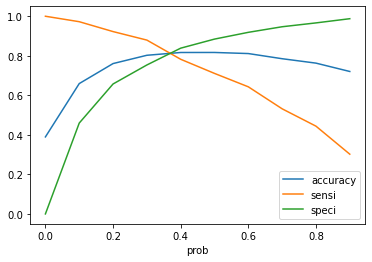

In [234]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [236]:
y_train_pred_final['FINAL_PREDICTED']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,FINAL_PREDICTED
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [241]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,FINAL_PREDICTED,lead_score
0,0,0.692600,2240,1,1,1,1,1,1,1,1,0,0,0,1,69
1,0,0.539248,113,1,1,1,1,1,1,1,0,0,0,0,1,54
2,1,0.718698,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.133628,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.014225,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.031692,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.854208,2976,1,1,1,1,1,1,1,1,1,1,0,1,85
7,0,0.399257,8431,0,1,1,1,1,0,0,0,0,0,0,0,40
8,1,0.745493,2770,1,1,1,1,1,1,1,1,1,0,0,1,75
9,1,0.995570,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [237]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.FINAL_PREDICTED))

0.8166139240506329


In [242]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','FINAL_PREDICTED']]
checking_df['FINAL_PREDICTED'].value_counts()

1    1926
0     536
Name: FINAL_PREDICTED, dtype: int64

In [243]:
1965/float(1965+497)

0.7981316003249391

#### Hence this is a good model.

## ROC  Curve - Converted_Prob

In [238]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [239]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

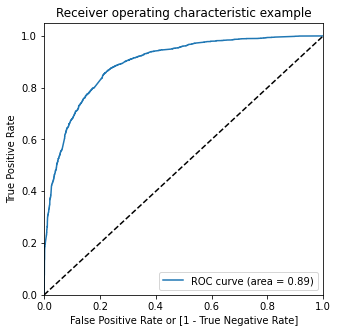

In [240]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### ROC Curve - Final Predicted

In [244]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED, 
                                         drop_intermediate = False )

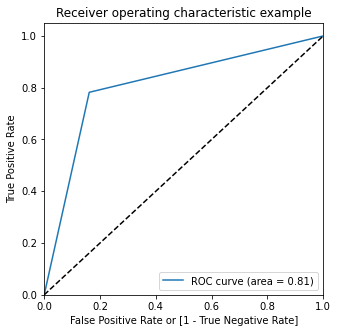

In [245]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED)

Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [246]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED)

0.8166139240506329

In [247]:
con_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED)
con_final

array([[3235,  623],
       [ 536, 1926]], dtype=int64)

In [248]:
TP = con_final[1,1] # true positive 
TN = con_final[0,0] # true negatives
FP = con_final[0,1] # false positives
FN = con_final[1,0] # false negatives

SENSITIVITY

In [249]:
TP / float(TP+FN)

0.7822908204711616

SPECIFICITY

In [250]:
TN / float(TN+FP)

0.8385173665111457

FALSE POSITIVE RATE

In [251]:
print(FP/ float(TN+FP))

0.16148263348885433


POSITIVE PREDICTIVE VALUE 

In [252]:
print (TP / float(TP+FP))

0.755590427618674


NEGATIVE PREDICTIVE VALUE

In [254]:
 print (TN / float(TN+ FN))

0.8578626359055953


PRECISION AND RECALL

In [256]:
from sklearn.metrics import precision_score, recall_score

In [257]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED)

0.755590427618674

In [258]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED)

0.7822908204711616

In [259]:
from sklearn.metrics import precision_recall_curve

In [260]:
y_train_pred_final.Converted, y_train_pred_final.FINAL_PREDICTED

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: FINAL_PREDICTED, Length: 6320, dtype: int64)

In [261]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

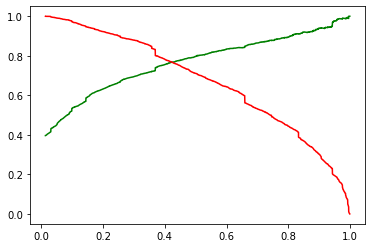

In [262]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on test data.

In [263]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [264]:
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2296,0,0.1875,0.665313,0.37500,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0.21875,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0.25000,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0.62500,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,1.00000,0,0,0,0,0,1,0,0,0,0,0


In [265]:
X_test_sm = sm.add_constant(X_test)

In [266]:
y_test_pred = res.predict(X_test_sm)

In [267]:
y_test_pred[:10]

2296    0.900062
8697    0.644749
7378    0.220473
8631    0.623345
4799    0.928426
4503    0.357389
7129    0.863910
1717    0.144108
8398    0.864212
5116    0.255433
dtype: float64

In [268]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [269]:
y_pred_1.head()

,0
2296,0.900062
8697,0.644749
7378,0.220473
8631,0.623345
4799,0.928426


In [270]:
y_test_df = pd.DataFrame(y_test)

In [271]:
y_test_df['LeadId'] = y_test_df.index

In [272]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [273]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [274]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.900062
1,0,8697,0.644749
2,0,7378,0.220473
3,0,8631,0.623345
4,1,4799,0.928426


In [275]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [280]:
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [281]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.900062
1,8697,0,0.644749
2,7378,0,0.220473
3,8631,0,0.623345
4,4799,1,0.928426


In [282]:
y_pred_final['FINAL_PREDICTED'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [283]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,FINAL_PREDICTED
0,2296,1,0.900062,1
1,8697,0,0.644749,1
2,7378,0,0.220473,0
3,8631,0,0.623345,1
4,4799,1,0.928426,1


In [284]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,FINAL_PREDICTED,lead_score
0,2296,1,0.900062,1,90
1,8697,0,0.644749,1,64
2,7378,0,0.220473,0,22
3,8631,0,0.623345,1,62
4,4799,1,0.928426,1,93
5,4503,0,0.357389,0,36
6,7129,0,0.863910,1,86
7,1717,0,0.144108,0,14
8,8398,0,0.864212,1,86
9,5116,1,0.255433,0,26


In [285]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','FINAL_PREDICTED']]
checking_test_df['FINAL_PREDICTED'].value_counts()

1    812
0    203
Name: FINAL_PREDICTED, dtype: int64

In [286]:
797/float(797+218)

0.7852216748768472

In [287]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.FINAL_PREDICTED)

0.813953488372093

In [288]:
con_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.FINAL_PREDICTED)
con_test

array([[1393,  301],
       [ 203,  812]], dtype=int64)

In [289]:
TP = con_test[1,1] # true positive 
TN = con_test[0,0] # true negatives
FP = con_test[0,1] # false positives
FN = con_test[1,0] # false negatives

SENSITIVITY

In [290]:
TP / float(TP+FN)

0.8

SPECIFICITY

In [291]:
TN / float(TN+FP)

0.8223140495867769

In [293]:
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.FINAL_PREDICTED))
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.FINAL_PREDICTED))

precision  0.7295597484276729
recall  0.8


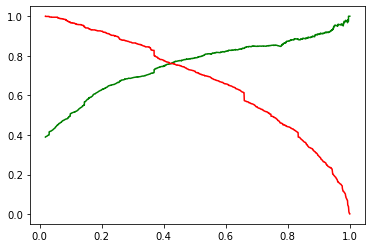

In [294]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

CONCLUSION: 
1.we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
-2.Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
  the respective values calculated using trained set.
3.Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
4.Hence overall this model seems to be good. 